## Image loading and getting properties
- Metadata: Height, width, data and time, model
- Dimension
- Color system

In [9]:
from PIL import Image
from PIL.ExifTags import TAGS # used for translating metadata into human readable format
import subprocess
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
os.getcwd()

'/home/jessica/Documents/SaruulFiles'

In [2]:
os.listdir()

['5x8-00384eff.png',
 '.ipynb_checkpoints',
 'cat.png',
 'Basics.ipynb',
 'cat.webp',
 'lala.png']

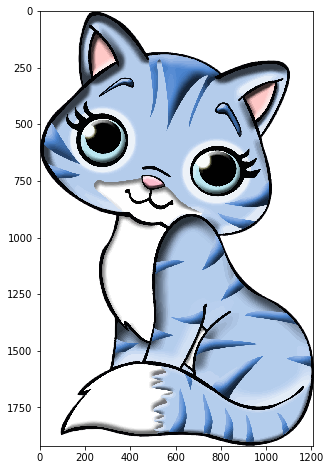

In [52]:
image = Image.open("/home/jessica/Documents/SaruulFiles/cat1.png")
plt.figure(figsize=(8,8))
plt.imshow(image)

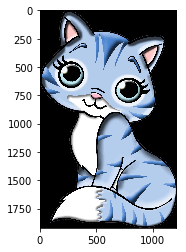

In [54]:
img = np.array(Image.open('/home/jessica/Documents/SaruulFiles/cat1.png'))
img = img[:, :, :3]
plt.imshow(img)

In [13]:
import subprocess
 
imgPath = "/home/jessica/Documents/SaruulFiles/cat1.png"
exeProcess = "hachoir-metadata"
process = subprocess.Popen([exeProcess,imgPath],
                           stdout=subprocess.PIPE,
                           stderr=subprocess.STDOUT,
                           universal_newlines=True)
Dic={}
 
for tag in process.stdout:
        line = tag.strip().split(':')
        Dic[line[0].strip()] = line[-1].strip()
 
for k,v in Dic.items():
    print(k,':', v)

Metadata : 
- Image width : 1207 pixels
- Image height : 1920 pixels
- Bits/pixel : 32
- Pixel format : RGBA
- Compression rate : 10.2x
- Compression : deflate
- MIME type : image/png
- Endianness : Big endian


In [14]:
img = np.array(Image.open('/home/jessica/Documents/SaruulFiles/cat1.png'))
print('# of dims: ',img.ndim)
print('img shape: ',img.shape)
print('dtype: ',img.dtype)

# of dims:  3
img shape:  (1920, 1207, 4)
dtype:  uint8


### 1. Saving ndarray as Image


In [15]:
path = '/home/jessica/Documents/SaruulFiles/cat1.png'
pil_img = Image.fromarray(img)
pil_img.save(path)

### 2. Rotate image


Text(0.5,1,'rotated')

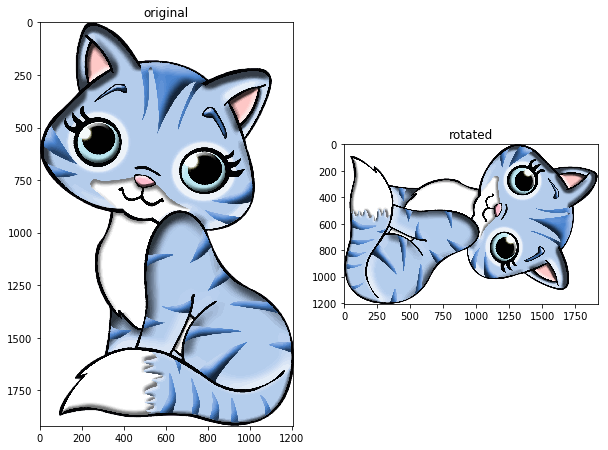

In [20]:
degrees = 90
img = np.array(Image.open('/home/jessica/Documents/SaruulFiles/cat1.png'))
# img = img.sum(2) / (255*3) # converting to grayscale

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")
img0 = img.copy()

# Algo: image(ndarray) -> transpose -> mirror image across y axis (middle column)

for _ in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    
    for j in range(0, img0.shape[1] // 2):

        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
        
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title("rotated")

### 3. Negative of an image


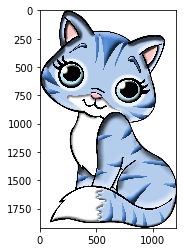

In [23]:
img = np.array(Image.open('/home/jessica/Documents/SaruulFiles/cat1.png'))
img_grey = img.sum(2) / (255*3) # summing over axis=2 (channel axis) to get grey scaled image
plt.imshow(image)

Text(0.5,1,'Negative of RGB image')

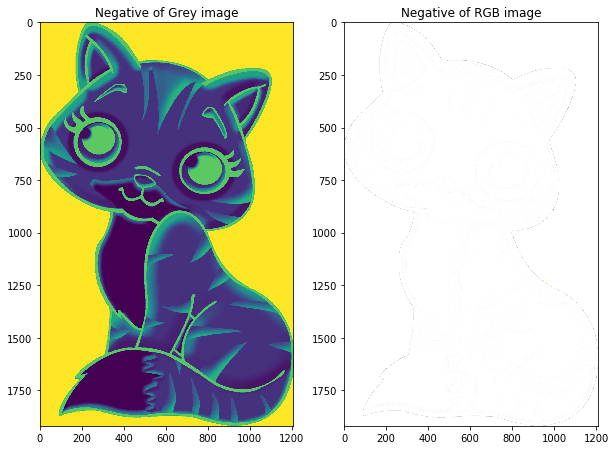

In [24]:
fig = plt.figure(figsize=(10, 10))
img_grey = 255*3 - img_grey        # 255 * 3 because we added along channel axis previously
fig.add_subplot(1, 2, 1)
plt.imshow(img_grey)
plt.title('Negative of Grey image')

img = 255 - img
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title('Negative of RGB image')

### 4. Padding black spaces


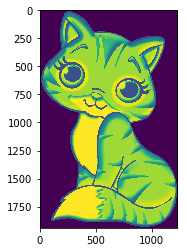

In [28]:
img = np.array(Image.open('/home/jessica/Documents/SaruulFiles/cat1.png'))
img_grey = img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((10,10),(10,10)), mode='constant')
plt.imshow(img0)

### 5. Visualizing RGB channels


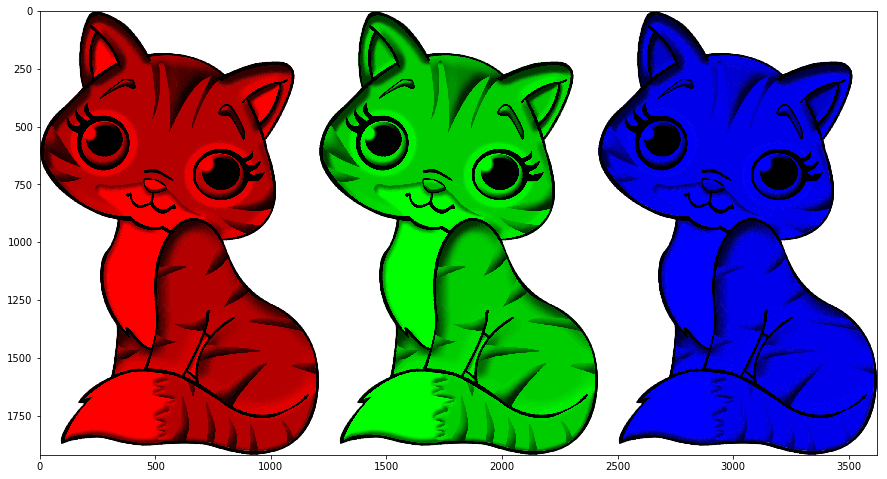

In [30]:
img = np.array(Image.open('/home/jessica/Documents/SaruulFiles/cat1.png'))

img_R, img_G, img_B = img.copy(), img.copy(), img.copy()

img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0


img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

### 6. Color Reduction:


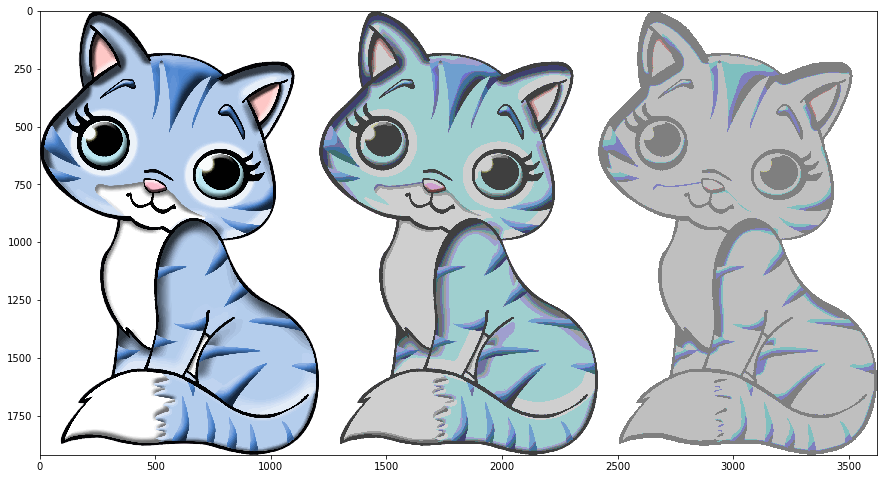

In [31]:
img = np.array(Image.open('/home/jessica/Documents/SaruulFiles/cat1.png'))

# Making Pixel values discrete by first division by // which gives int and then multiply by same factor

img_0 = (img // 64) * 64    
img_1 = (img // 128) * 128

img_all = np.concatenate((img, img_0, img_1), axis=1)

plt.figure(figsize=(15, 15))
plt.imshow(img_all)

### 7. Trim Image by array slicing


Text(0.5,1,'Trimmed')

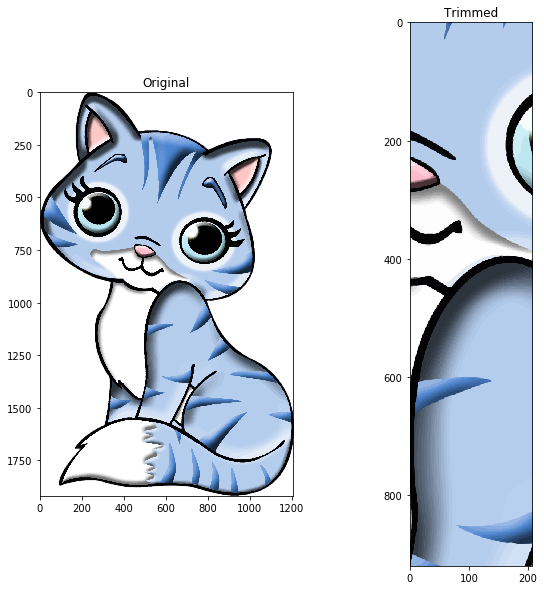

In [39]:
img = np.array(Image.open('/home/jessica/Documents/SaruulFiles/cat1.png'))
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

img0 = img[500:-500, 500:-500, :]

fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')

### 8. Pasting with slice


Text(0.5,1,'Pasted with slice')

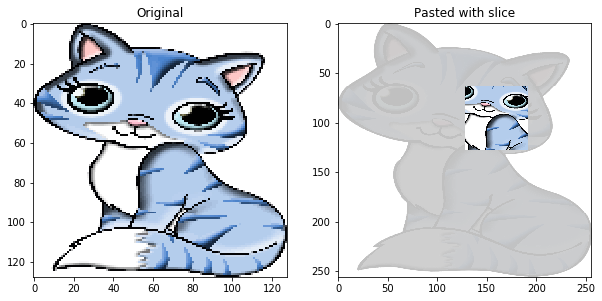

In [41]:
src = np.array(Image.open('cat1.png').resize((128, 128)))
dst = np.array(Image.open('cat1.png').resize((256, 256))) // 4

dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96]

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(src)
plt.title('Original')

fig.add_subplot(1, 2, 2)
plt.imshow(dst_copy)
plt.title('Pasted with slice')

### 9. Flip on axis=1 and rotate anticlockwise: transpose


Text(0.5,1,'Flip_rotated')

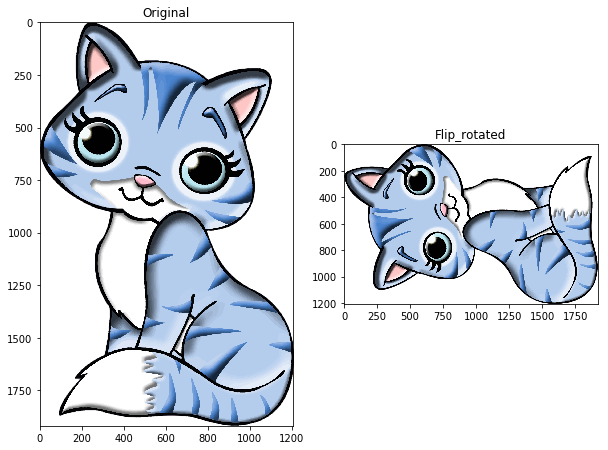

In [42]:
fig = plt.figure(figsize=(10, 10))

img = np.array(Image.open('cat1.png'))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

img0 = img.transpose(1, 0, 2)

fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Flip_rotated')

### 10. Creating Gradual Shades


In [44]:

x = np.linspace(0, 10, 3)  # start, stop, num of samples


# np.tile:         Repeats our given 1-D/ 2-D array in either/both axes
x= np.arange(5).reshape(1,-1)
np.tile(x, (3, 1))
# array([[0, 1, 2, 3, 4],
#        [0, 1, 2, 3, 4],
#        [0, 1, 2, 3, 4]])

np.tile(x, (2, 2))
# array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
#        [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])

In [45]:
Height = 256
Width = 512
start_list = (0, 0, 192)
stop_list = (255, 255, 64)
is_horizontal_list = (True, False, False)


def gradation_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T   #imagine it in your head, you'll get it
    
    
def gradation_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)),dtype=np.float)
    
    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = gradation_2d(start, stop, width, height, is_horizontal)
    return result

/home/jessica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


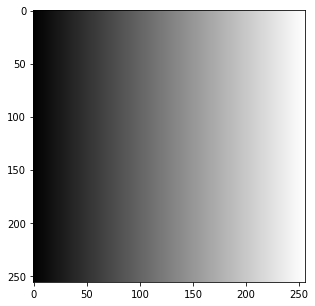

In [46]:
img0 = gradation_3d(256, 256, (0,0,0),(255,255,255),(True,True,True))
img0 = np.uint8(img0)

plt.figure(figsize=(10, 5))
plt.imshow(img0)

/home/jessica/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


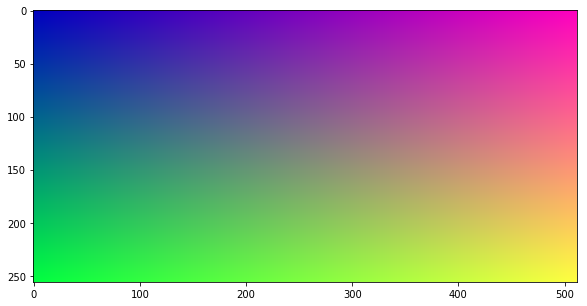

In [47]:
img0 = gradation_3d(Width, Height, start_list, stop_list, is_horizontal_list)
img0 = np.uint8(img0)

plt.figure(figsize=(10, 5))
plt.imshow(img0)

### 11. Binarize image


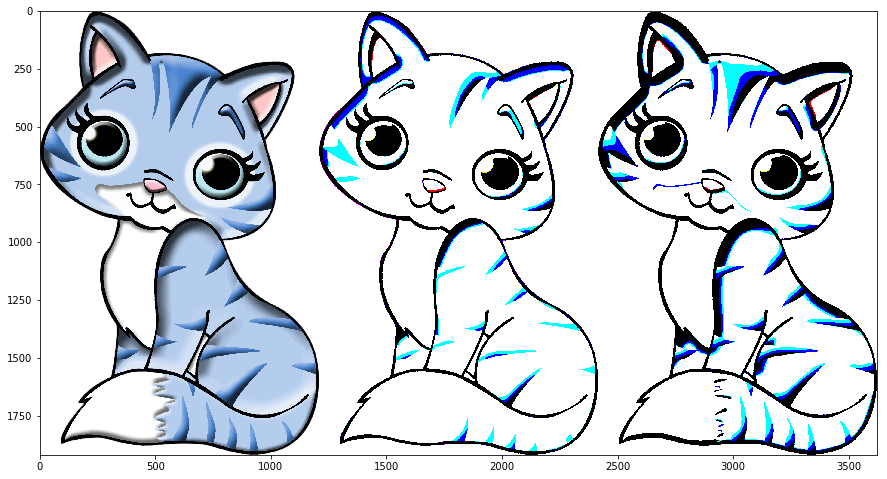

In [49]:
img = np.array(Image.open('cat1.png'))

img_64 = (img > 64) * 255
img_128 = (img > 128) * 255

fig = plt.figure(figsize=(15, 15))

img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)


### 12. Blending two images


uint8


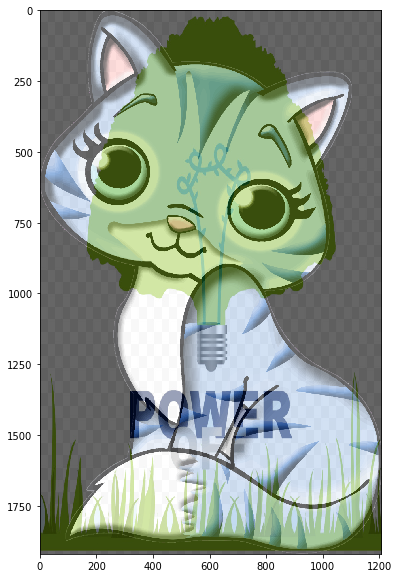

In [51]:
img = np.array(Image.open('cat1.png'))
img = img[:, :, :3]

img0 = np.array(Image.open('lala.png').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)

print(img.dtype)
# uint8

dst = (img * 0.6 + img0 * 0.4).astype(np.uint8)   # Blending them in

plt.figure(figsize=(10, 10))
plt.imshow(dst)


### 13. Masking images


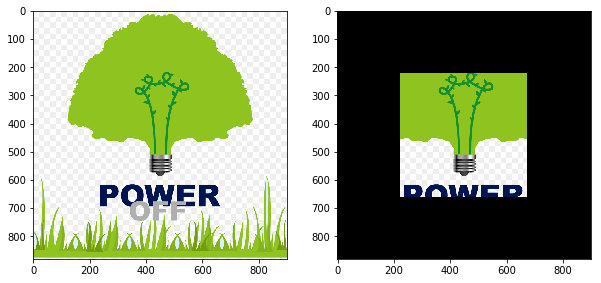

In [56]:
img = np.array(Image.open('lala.png'))

ones = np.ones((img.shape[0] // 2, img.shape[1] // 2, 3))
zeros = np.zeros(((img.shape[0] // 4, img.shape[1] // 4, 3)))


zeros_mid = np.zeros(((img.shape[0] // 2, img.shape[1] // 4, 3)))
up = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
middle = np.concatenate((zeros_mid, ones, zeros_mid), axis=1)
down = np.concatenate((zeros, zeros, zeros, zeros), axis=1)


mask = np.concatenate((up, middle, down), axis=0)
mask = mask / 255

img0 = mask * img

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)

fig.add_subplot(1, 2, 2)
plt.imshow(img0)

## Understanding image metrics

In [57]:
from sewar.full_ref import uqi

ModuleNotFoundError: No module named 'sewar'

In [59]:
! pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.5-py3-none-any.whl size=10614 sha256=6967915677b34ac2e470393df8962aaccb1e84dc4dff1489e3c29c5d5aeb5761
  Stored in directory: /home/jessica/.cache/pip/wheels/7a/38/6b/d066cfcb2b1c1c9b059b9ce1bdc4803b469359214e8dad4e3e
Successfully built sewar


# Image metrics

### MSE

In [62]:
import numpy as np
from PIL import Image

# Load two images
image1 = np.array(Image.open("cat1.png"))
image2 = np.array(Image.open("cat1.png"))

# Calculate the MSE between the two images
mse = np.mean((image1 - image2)**2)

print("MSE between the two images:", mse)

MSE between the two images: 0.0
